## Singular-value decomposition

In [1]:

import numpy as np
from numpy import array
from scipy.linalg import svd

# define a matrix
A = array([[1, 2], [3, 4], [5, 6]])

A = array([[1,0,0,0,2], [0,0,3,0,0], [0,0,0,0,0], [0,4,0,0,0]])
A

array([[1, 0, 0, 0, 2],
       [0, 0, 3, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 4, 0, 0, 0]])

In [2]:
# SVD
U, d, Vt = svd(A)

In [8]:
U.shape ,d.shape,  Vt.shape

((4, 4), (4,), (5, 5))

In [6]:
U

array([[ 0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  0., -1.],
       [ 1.,  0.,  0.,  0.]])

In [3]:
d

array([4.        , 3.        , 2.23606798, 0.        ])

In [4]:
np.diag(d)

array([[4.        , 0.        , 0.        , 0.        ],
       [0.        , 3.        , 0.        , 0.        ],
       [0.        , 0.        , 2.23606798, 0.        ],
       [0.        , 0.        , 0.        , 0.        ]])

In [5]:
Vt

array([[-0.        ,  1.        ,  0.        , -0.        ,  0.        ],
       [-0.        ,  0.        ,  1.        , -0.        ,  0.        ],
       [ 0.4472136 ,  0.        ,  0.        ,  0.        ,  0.89442719],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ],
       [-0.89442719,  0.        ,  0.        ,  0.        ,  0.4472136 ]])

In [9]:
# Applying SVD on dataset
import pandas as pd
data = pd.read_excel("University_Clustering.xlsx")
data.head()

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,RI,1310,89,22,13,22704,94
1,CalTech,CA,1415,100,25,6,63575,81
2,CMU,PA,1260,62,59,9,25026,72
3,Columbia,NY,1310,76,24,12,31510,88
4,Cornell,NY,1280,83,33,13,21864,90


In [10]:
data = data.iloc[:,2:]
data.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81
2,1260,62,59,9,25026,72
3,1310,76,24,12,31510,88
4,1280,83,33,13,21864,90


In [11]:
from sklearn.decomposition import TruncatedSVD
# svd
svd = TruncatedSVD(n_components=3) #n_components means output columns
svd.fit(data)
result = pd.DataFrame(svd.transform(data))
result.head()

,0,1,2
0,22737.587399,-454.514059,-25.702416
1,63583.170928,990.046543,12.221911
2,25055.946462,-315.640243,24.117560
3,31537.214404,-119.844228,-8.256362
4,21897.045349,-456.472762,-13.370650


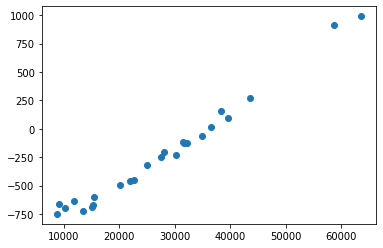

In [12]:
result.columns = "pc0", "pc1", "pc2"
# Scatter diagram
import matplotlib.pylab as plt
plt.scatter(x = result.pc0, y = result.pc1)